In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-paper')
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 150

from scipy.stats import ortho_group

In [84]:
# generate the data

m = 20
n = 30
d = 3
r = 3

ortho_matrix_1 = ortho_group.rvs(dim=m)
ortho_matrix_2 = ortho_group.rvs(dim=n)
X = ortho_matrix_1[:, :r]
Y = ortho_matrix_2[:, :r]
sigma = np.diag([10, 5, 1])
M = X @ sigma @ Y.T

In [85]:
# init
alpha = 5e-3
U = alpha * np.random.normal(0, 1, size=(m, d))
V = alpha * np.random.normal(0, 1, size=(n, d))

T = 10000
eta = 0.08

residuals = []
xUUxs = []
xUVys = []
for t in range(T):
    U_new = U + eta * (M - U @ V.T) @ V
    V_new = V + eta * (M.T - V @ U.T) @ U
    U, V = U_new, V_new
    # x_i = ortho_matrix_1[:, 12].reshape((m, 1))
    # y_j = ortho_matrix_2[:, 1].reshape((n, 1))
    # xUVy = x_i.T @ U @ V.T @ y_j
    residual = np.linalg.norm(U @ V.T - M, ord='fro')
    residuals.append(residual)
    # xUUxs.append(xUUx[0][0])
    # xUVys.append(xUVy[0][0])


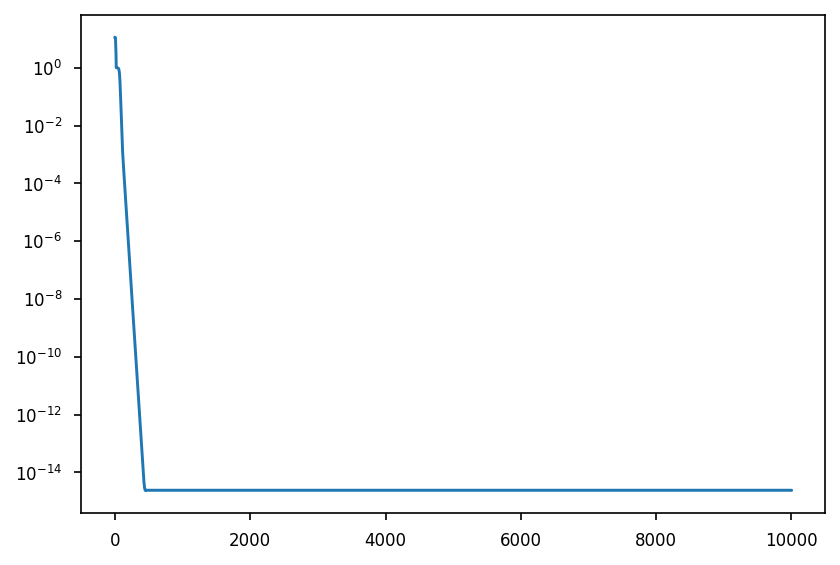

In [86]:
plt.plot(residuals)
plt.plot(np.abs(xUVys))
plt.yscale('log')